In [1]:
!pip3 install autodistill-grounded-sam-2 roboflow opencv-python

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.0/6.0 MB 37.8 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 84.5/84.5 kB 9.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 66.8/66.8 kB 7.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.9/49.9 MB 14.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.8/7.8 MB 85.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 181.5/181.5 kB 18.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 4.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 109.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 84.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 56.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 6.0 MB/s eta 0:00:00
   ━━━━

In [2]:
!pip install onnxruntime rembg

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.0/16.0 MB 52.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 41.2/41.2 kB 3.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 46.0/46.0 kB 4.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 54.5/54.5 kB 4.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 86.8/86.8 kB 9.1 MB/s eta 0:00:00


In [3]:
from rembg import remove
from PIL import Image

# Load the reference image
ref_image = Image.open("/content/10-handgun-png-image.png")

# Remove background to extract object
extracted_object = remove(ref_image)

# Save the extracted object
extracted_object.save("object.png")

100%|████████████████████████████████████████| 176M/176M [00:00<00:00, 224GB/s]
/usr/local/lib/python3.11/dist-packages/PIL/Image.py:1045: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


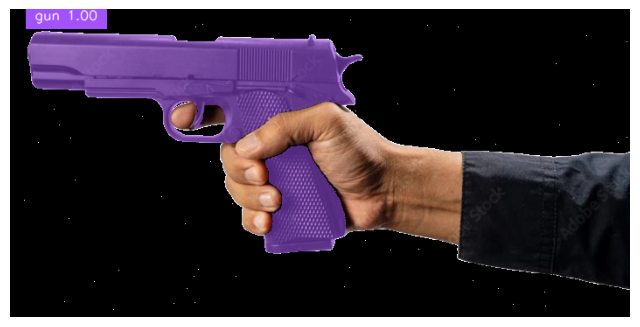

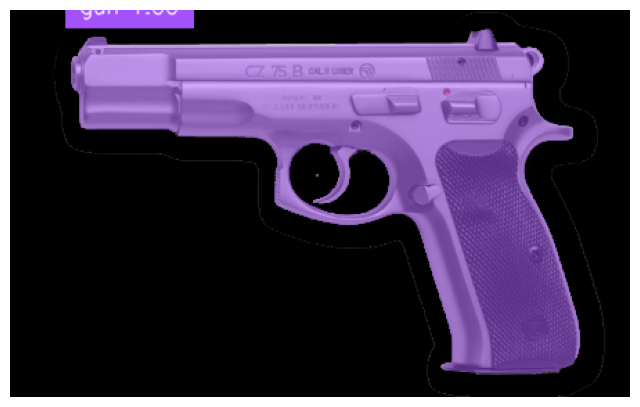

Labeling images: 0it [00:00, ?it/s]

Labeled dataset created - ready for distillation.


In [13]:
from autodistill_grounded_sam_2 import GroundedSAM2
from autodistill.detection import CaptionOntology
from autodistill.utils import plot
import cv2

# Define an ontology to map class names to our Grounded SAM 2 prompt
ontology = CaptionOntology({
    "gun": "gun"  # Replace with actual class names
})

# Load the model with the defined ontology
base_model = GroundedSAM2(ontology=ontology)

# Define image paths
image_paths = [
    "/content/1000_F_614917913_jKt67gV6ZKuoDfGvDYxiE9IVdiYRVHOS-removebg-preview.jpg",
    "/content/object.png"
]

# Process each image
for img_path in image_paths:
    image = cv2.imread(img_path)
    results = base_model.predict(image)  # Assuming predict returns detections

    # Plot results for each image
    plot(image=image, classes=base_model.ontology.classes(), detections=results)

# Label all images in a folder called `context_images`
base_model.label("./context_images", extension=".jpeg")

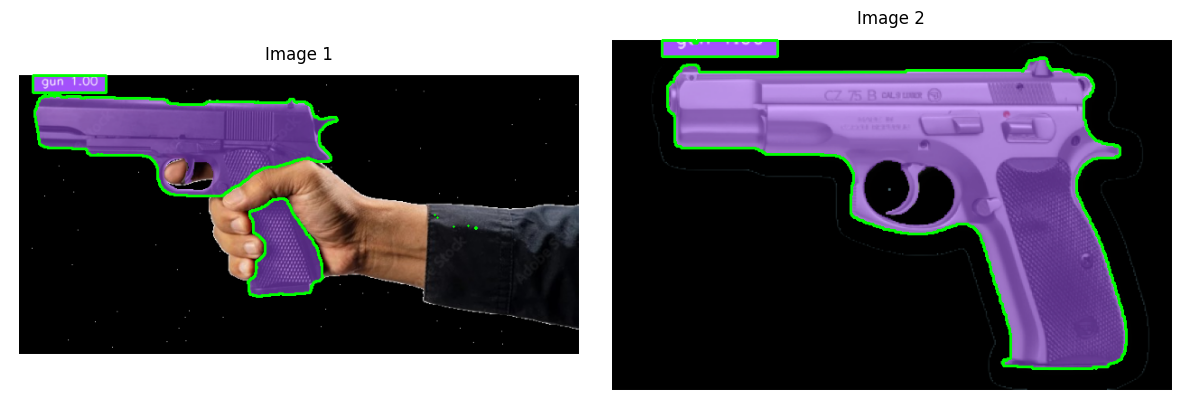

Extracted Data for /content/download (3).png
Polygon Coordinates: [[[297, 145], [296, 146], [291, 146], [289, 148], [288, 148], [284, 152], [283, 152], [281, 154], [279, 154], [277, 156], [275, 156], [274, 157], [272, 157], [271, 158], [268, 158], [267, 159], [266, 159], [265, 160], [265, 164], [266, 165], [266, 166], [268, 168], [268, 170], [269, 171], [269, 182], [270, 183], [271, 183], [273, 185], [274, 185], [281, 192], [281, 193], [282, 194], [282, 205], [281, 206], [281, 207], [275, 213], [274, 213], [273, 214], [272, 214], [272, 220], [273, 221], [272, 222], [272, 227], [271, 228], [271, 230], [268, 233], [267, 233], [265, 235], [264, 235], [264, 236], [263, 237], [263, 238], [264, 239], [264, 247], [265, 248], [265, 250], [266, 251], [268, 251], [269, 252], [272, 252], [273, 253], [278, 253], [279, 252], [287, 252], [288, 251], [297, 251], [298, 250], [301, 250], [302, 251], [315, 251], [316, 250], [326, 250], [327, 249], [331, 249], [332, 248], [332, 247], [333, 246], [333, 24

In [12]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Define image paths
image_paths = [
    "/content/download (3).png",
    "/content/download (7).png"
]

# Define the violet color range for masking
lower_violet = np.array([120, 50, 50])   # Adjust HSV values if needed
upper_violet = np.array([160, 255, 255])

# Set up figure for displaying results
fig, axes = plt.subplots(1, 2, figsize=(12, 6))

# Dictionary to store extracted data for both images
extracted_data_list = []

# Process each image
for i, image_path in enumerate(image_paths):
    # Load the image
    image = cv2.imread(image_path)

    if image is None:
        print(f"Error loading image: {image_path}")
        continue  # Skip if image is not found

    # Convert to RGB for visualization
    image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

    # Convert to HSV for color-based segmentation
    hsv = cv2.cvtColor(image, cv2.COLOR_BGR2HSV)

    # Create a mask for the violet regions
    mask = cv2.inRange(hsv, lower_violet, upper_violet)

    # Find contours in the mask
    contours, _ = cv2.findContours(mask, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

    # Variables to store polygon and bounding box coordinates
    polygon_coords = []
    bounding_boxes = []

    # Extract contours and bounding boxes
    for cnt in contours:
        if cv2.contourArea(cnt) > 500:  # Filter small regions
            polygon = cnt.reshape(-1, 2).tolist()
            polygon_coords.append(polygon)

            x, y, w, h = cv2.boundingRect(cnt)
            bounding_boxes.append((x, y, w, h))

    # Store extracted data
    extracted_data = {
        "image_path": image_path,
        "polygon_coords": polygon_coords,
        "bounding_boxes": bounding_boxes
    }
    extracted_data_list.append(extracted_data)

    # Visualize the detected regions
    for cnt in contours:
        cv2.polylines(image_rgb, [cnt], isClosed=True, color=(0, 255, 0), thickness=2)

    # Display the processed image
    axes[i].imshow(image_rgb)
    axes[i].axis("off")
    axes[i].set_title(f"Image {i+1}")

# Show both images with detected violet regions
plt.tight_layout()
plt.show()

# Print extracted data
for data in extracted_data_list:
    print("Extracted Data for", data["image_path"])
    print("Polygon Coordinates:", data["polygon_coords"])
    print("Bounding Boxes:", data["bounding_boxes"])
    print("\n")

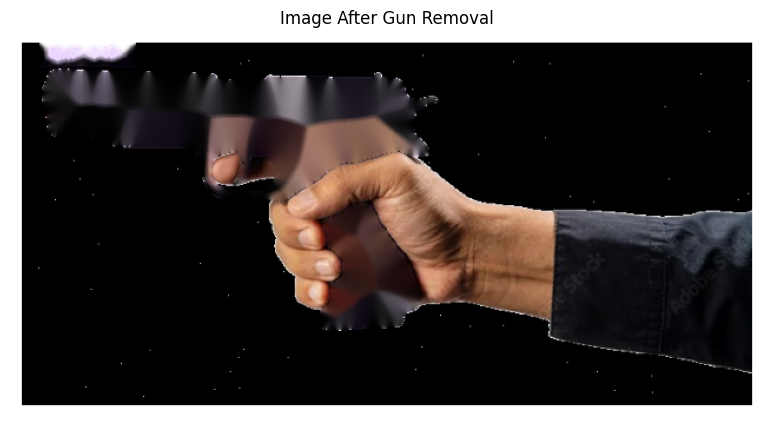

'/content/image_no_gun.png'

In [14]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Load the image
image_path = "/content/download (3).png"
image = cv2.imread(image_path)
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

# Convert the image to HSV color space to detect the purple mask
hsv = cv2.cvtColor(image, cv2.COLOR_RGB2HSV)

# Define range for purple color mask (Adjust these values if needed)
lower_purple = np.array([120, 50, 50])
upper_purple = np.array([160, 255, 255])

# Create a mask to detect the purple highlighted area
mask = cv2.inRange(hsv, lower_purple, upper_purple)

# Apply inpainting to remove the masked region
image_no_gun = cv2.inpaint(image, mask, inpaintRadius=5, flags=cv2.INPAINT_TELEA)

# Show the result
plt.figure(figsize=(10, 5))
plt.imshow(image_no_gun)
plt.axis("off")
plt.title("Image After Gun Removal")
plt.show()

# Save the processed image
output_path = "/content/image_no_gun.png"
cv2.imwrite(output_path, cv2.cvtColor(image_no_gun, cv2.COLOR_RGB2BGR))
output_path